# Implementing and Constructing 3Onet model using Keras

In [26]:
# example of simple cnn model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Conv2DTranspose
from keras.layers import BatchNormalization
from tensorflow.keras import activations
from tensorflow.keras import layers

In [163]:

# create model
model = Sequential()
# model.add(Conv2D(64, kernel_size=1 , padding='same', input_shape=(51,183,5)))
# model.add(Conv2D(64, kernel_size=1 , padding='same', input_shape=(51,183,5)))
model.add(Conv2D(64, kernel_size=1 , padding='same', input_shape=(50,170,5)))
model.add(Conv2D(64, kernel_size=1 , padding='same', input_shape=(50,170,5)))
model.add(layers.Activation(activations.relu))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=1))
model.add(Conv2D(128, kernel_size=1))
model.add(layers.Activation(activations.relu))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=1))
model.add(Conv2D(64, kernel_size=1))
model.add(layers.Activation(activations.relu))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=1))
# summarize model
model.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_372 (Conv2D)          (None, 50, 170, 64)       384       
_________________________________________________________________
conv2d_373 (Conv2D)          (None, 50, 170, 64)       4160      
_________________________________________________________________
activation_6 (Activation)    (None, 50, 170, 64)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 170, 64)       256       
_________________________________________________________________
conv2d_374 (Conv2D)          (None, 50, 170, 128)      8320      
_________________________________________________________________
conv2d_375 (Conv2D)          (None, 50, 170, 128)      16512     
_________________________________________________________________
activation_7 (Activation)    (None, 50, 170, 128)    

# Data Pre-Processing starts here

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('E:\Work\Studies\SEM 8\ISRO material\BTS201907010700 - Copy.csv')
df2 = df[['A']]
df2l = df2.values.tolist()
df2l

dff=df2l[:9332]
dff[-1]
dff.append(290)
len(dff)

a = np.array(dff).reshape(51,183)
a
pd.DataFrame(a).to_csv('E:\Work\Studies\SEM 8\ISRO material\data_1.csv')


KeyError: "None of [Index(['A'], dtype='object')] are in the [columns]"

In [10]:
df = pd.read_csv('E:\Work\Studies\SEM 8\ISRO material\stacked.csv')
df.unstack()


82       0        82.000
         1        82.000
         2        82.000
         3        82.000
         4        82.000
                   ...  
-25.886  31198    -4.901
         31199   -11.101
         31200   -28.923
         31201   -31.636
         31202   -24.725
Length: 218421, dtype: float64

## Generating Individual Channel Stack for all 5 different channel

In [5]:
data1 = pd.read_csv('E:\Work\Studies\SEM 8\ISRO material\data_1_complete.csv')
d1 = data1.loc[:,'21.99':].values
d1 = pd.DataFrame(d1, columns = [21.99,21.91,21.83,21.75,21.67,21.59,21.51,21.43,21.34,21.26,21.18,21.1,21.02,20.94,20.86,20.78,20.7,20.62,20.54,20.46,20.38,20.3,20.22,20.14,20.06,19.98,19.9,19.82,19.74,19.66,19.58,19.5,19.42,19.34,19.26,19.18,19.1,19.02,18.94,18.86,18.79,18.71,18.63,18.55,18.47,18.39,18.31,18.23,18.16,18.08,18,17.92,17.84,17.76,17.68,17.61,17.53,17.45,17.37,17.29,17.22,17.14,17.06,16.98,16.91,16.83,16.75,16.67,16.6,16.52,16.44,16.36,16.29,16.21,16.13,16.05,15.98,15.9,15.82,15.75,15.67,15.59,15.51,15.44,15.36,15.28,15.21,15.13,15.05,14.98,14.9,14.82,14.75,14.67,14.6,14.52,14.44,14.37,14.29,14.21,14.14,14.06,13.99,13.91,13.83,13.76,13.68,13.61,13.53,13.46,13.38,13.3,13.23,13.15,13.08,13,12.93,12.85,12.78,12.7,12.62,12.55,12.47,12.4,12.32,12.25,12.17,12.1,12.02,11.95,11.87,11.8,11.72,11.65,11.57,11.5,11.42,11.35,11.27,11.2,11.12,11.05,10.97,10.9,10.83,10.75,10.68,10.6,10.53,10.45,10.38,10.3,10.23,10.16,10.08,10.01,9.93,9.86,9.78,9.71,9.64,9.56,9.49,9.41,9.34,9.27,9.19,9.12,9.04,8.97,8.9,8.82,8.75,8.67,8.6,8.53,8.45,8.38,8.31,8.23,8.16,8.08,8.01], index = [82,82.07,82.15,82.21,82.29,82.36,82.43,82.51,82.59,82.65,82.73,82.8,82.87,82.95,83.1,83.19,83.27,83.35,83.42,83.5,83.58,83.65,83.72,83.8,83.87,83.95,84.02,84.09,84.16,84.23,84.3,84.37,84.44,84.51,84.58,84.65,84.72,84.79,84.86,84.93,85,85.07,85.14,85.21,85.28,85.35,85.42,85.49,85.56,85.63,85.7])
d1n = d1.to_numpy()
d1n

array([[294.468, 289.304, 289.954, ..., 306.466, 306.507, 300.973],
       [293.252, 287.994, 292.338, ..., 305.83 , 303.226, 297.133],
       [283.767, 291.063, 290.342, ..., 305.582, 303.276, 296.864],
       ...,
       [266.676, 284.083, 285.105, ..., 301.443, 298.576, 295.112],
       [266.399, 280.187, 282.072, ..., 300.799, 296.684, 293.002],
       [269.709, 273.403, 272.279, ..., 298.875, 293.385, 290.   ]])

In [6]:
data2 = pd.read_csv('E:\Work\Studies\SEM 8\ISRO material\data_2_complete.csv')
d2 = data2.loc[:,'21.99':].values
d2 = pd.DataFrame(d2, columns = [21.99,21.91,21.83,21.75,21.67,21.59,21.51,21.43,21.34,21.26,21.18,21.1,21.02,20.94,20.86,20.78,20.7,20.62,20.54,20.46,20.38,20.3,20.22,20.14,20.06,19.98,19.9,19.82,19.74,19.66,19.58,19.5,19.42,19.34,19.26,19.18,19.1,19.02,18.94,18.86,18.79,18.71,18.63,18.55,18.47,18.39,18.31,18.23,18.16,18.08,18,17.92,17.84,17.76,17.68,17.61,17.53,17.45,17.37,17.29,17.22,17.14,17.06,16.98,16.91,16.83,16.75,16.67,16.6,16.52,16.44,16.36,16.29,16.21,16.13,16.05,15.98,15.9,15.82,15.75,15.67,15.59,15.51,15.44,15.36,15.28,15.21,15.13,15.05,14.98,14.9,14.82,14.75,14.67,14.6,14.52,14.44,14.37,14.29,14.21,14.14,14.06,13.99,13.91,13.83,13.76,13.68,13.61,13.53,13.46,13.38,13.3,13.23,13.15,13.08,13,12.93,12.85,12.78,12.7,12.62,12.55,12.47,12.4,12.32,12.25,12.17,12.1,12.02,11.95,11.87,11.8,11.72,11.65,11.57,11.5,11.42,11.35,11.27,11.2,11.12,11.05,10.97,10.9,10.83,10.75,10.68,10.6,10.53,10.45,10.38,10.3,10.23,10.16,10.08,10.01,9.93,9.86,9.78,9.71,9.64,9.56,9.49,9.41,9.34,9.27,9.19,9.12,9.04,8.97,8.9,8.82,8.75,8.67,8.6,8.53,8.45,8.38,8.31,8.23,8.16,8.08,8.01], index = [82,82.07,82.15,82.21,82.29,82.36,82.43,82.51,82.59,82.65,82.73,82.8,82.87,82.95,83.1,83.19,83.27,83.35,83.42,83.5,83.58,83.65,83.72,83.8,83.87,83.95,84.02,84.09,84.16,84.23,84.3,84.37,84.44,84.51,84.58,84.65,84.72,84.79,84.86,84.93,85,85.07,85.14,85.21,85.28,85.35,85.42,85.49,85.56,85.63,85.7])
d2n = d2.to_numpy()
d2n



array([[229.702, 228.992, 228.265, ..., 243.35 , 243.35 , 242.637],
       [230.739, 230.051, 228.992, ..., 242.877, 242.155, 241.665],
       [232.396, 231.077, 228.265, ..., 241.418, 241.911, 242.155],
       ...,
       [222.194, 220.819, 228.265, ..., 243.817, 242.877, 242.397],
       [218.878, 219.376, 225.177, ..., 242.877, 242.397, 241.911],
       [217.333, 221.743, 236.065, ..., 242.397, 242.155, 242.   ]])

In [7]:
data3 = pd.read_csv('E:\Work\Studies\SEM 8\ISRO material\data_3_complete.csv')
d3 = data3.loc[:,'21.99':].values
d3 = pd.DataFrame(d3, columns = [21.99,21.91,21.83,21.75,21.67,21.59,21.51,21.43,21.34,21.26,21.18,21.1,21.02,20.94,20.86,20.78,20.7,20.62,20.54,20.46,20.38,20.3,20.22,20.14,20.06,19.98,19.9,19.82,19.74,19.66,19.58,19.5,19.42,19.34,19.26,19.18,19.1,19.02,18.94,18.86,18.79,18.71,18.63,18.55,18.47,18.39,18.31,18.23,18.16,18.08,18,17.92,17.84,17.76,17.68,17.61,17.53,17.45,17.37,17.29,17.22,17.14,17.06,16.98,16.91,16.83,16.75,16.67,16.6,16.52,16.44,16.36,16.29,16.21,16.13,16.05,15.98,15.9,15.82,15.75,15.67,15.59,15.51,15.44,15.36,15.28,15.21,15.13,15.05,14.98,14.9,14.82,14.75,14.67,14.6,14.52,14.44,14.37,14.29,14.21,14.14,14.06,13.99,13.91,13.83,13.76,13.68,13.61,13.53,13.46,13.38,13.3,13.23,13.15,13.08,13,12.93,12.85,12.78,12.7,12.62,12.55,12.47,12.4,12.32,12.25,12.17,12.1,12.02,11.95,11.87,11.8,11.72,11.65,11.57,11.5,11.42,11.35,11.27,11.2,11.12,11.05,10.97,10.9,10.83,10.75,10.68,10.6,10.53,10.45,10.38,10.3,10.23,10.16,10.08,10.01,9.93,9.86,9.78,9.71,9.64,9.56,9.49,9.41,9.34,9.27,9.19,9.12,9.04,8.97,8.9,8.82,8.75,8.67,8.6,8.53,8.45,8.38,8.31,8.23,8.16,8.08,8.01], index = [82,82.07,82.15,82.21,82.29,82.36,82.43,82.51,82.59,82.65,82.73,82.8,82.87,82.95,83.1,83.19,83.27,83.35,83.42,83.5,83.58,83.65,83.72,83.8,83.87,83.95,84.02,84.09,84.16,84.23,84.3,84.37,84.44,84.51,84.58,84.65,84.72,84.79,84.86,84.93,85,85.07,85.14,85.21,85.28,85.35,85.42,85.49,85.56,85.63,85.7])
d3n = d3.to_numpy()
d3n


array([[255.588    , 244.594    , 246.391    , ..., 289.806    ,
        290.523    , 280.685    ],
       [252.923    , 244.726    , 250.362    , ..., 289.808    ,
        286.568    , 275.241    ],
       [236.625    , 247.68     , 246.804    , ..., 289.367    ,
        286.835    , 276.768    ],
       ...,
       [215.015    , 249.836    , 255.127    , ..., 288.701    ,
        282.533    , 276.119    ],
       [215.016    , 246.729    , 254.943    , ..., 287.084    ,
        279.439    , 271.618    ],
       [227.334    , 240.581    , 229.721    , ..., 283.167    ,
        273.608    , 229.1688626]])

In [8]:
data4 = pd.read_csv('E:\Work\Studies\SEM 8\ISRO material\data_4_complete.csv')
d4 = data4.loc[:,'21.99':].values
d4 = pd.DataFrame(d4, columns = [21.99,21.91,21.83,21.75,21.67,21.59,21.51,21.43,21.34,21.26,21.18,21.1,21.02,20.94,20.86,20.78,20.7,20.62,20.54,20.46,20.38,20.3,20.22,20.14,20.06,19.98,19.9,19.82,19.74,19.66,19.58,19.5,19.42,19.34,19.26,19.18,19.1,19.02,18.94,18.86,18.79,18.71,18.63,18.55,18.47,18.39,18.31,18.23,18.16,18.08,18,17.92,17.84,17.76,17.68,17.61,17.53,17.45,17.37,17.29,17.22,17.14,17.06,16.98,16.91,16.83,16.75,16.67,16.6,16.52,16.44,16.36,16.29,16.21,16.13,16.05,15.98,15.9,15.82,15.75,15.67,15.59,15.51,15.44,15.36,15.28,15.21,15.13,15.05,14.98,14.9,14.82,14.75,14.67,14.6,14.52,14.44,14.37,14.29,14.21,14.14,14.06,13.99,13.91,13.83,13.76,13.68,13.61,13.53,13.46,13.38,13.3,13.23,13.15,13.08,13,12.93,12.85,12.78,12.7,12.62,12.55,12.47,12.4,12.32,12.25,12.17,12.1,12.02,11.95,11.87,11.8,11.72,11.65,11.57,11.5,11.42,11.35,11.27,11.2,11.12,11.05,10.97,10.9,10.83,10.75,10.68,10.6,10.53,10.45,10.38,10.3,10.23,10.16,10.08,10.01,9.93,9.86,9.78,9.71,9.64,9.56,9.49,9.41,9.34,9.27,9.19,9.12,9.04,8.97,8.9,8.82,8.75,8.67,8.6,8.53,8.45,8.38,8.31,8.23,8.16,8.08,8.01], index = [82,82.07,82.15,82.21,82.29,82.36,82.43,82.51,82.59,82.65,82.73,82.8,82.87,82.95,83.1,83.19,83.27,83.35,83.42,83.5,83.58,83.65,83.72,83.8,83.87,83.95,84.02,84.09,84.16,84.23,84.3,84.37,84.44,84.51,84.58,84.65,84.72,84.79,84.86,84.93,85,85.07,85.14,85.21,85.28,85.35,85.42,85.49,85.56,85.63,85.7])
d4n = d4.to_numpy()
d4n


array([[247.378    , 238.366    , 239.937    , ..., 286.709    ,
        286.696    , 275.808    ],
       [243.915    , 239.652    , 243.183    , ..., 286.67     ,
        282.375    , 270.308    ],
       [232.545    , 242.439    , 240.291    , ..., 286.471    ,
        283.373    , 273.205    ],
       ...,
       [215.855    , 245.209    , 249.768    , ..., 285.024    ,
        277.767    , 270.302    ],
       [215.96     , 241.014    , 248.704    , ..., 283.637    ,
        274.774    , 266.739    ],
       [224.416    , 235.101    , 228.901    , ..., 278.417    ,
        269.583    , 228.5591978]])

In [9]:
data5 = pd.read_csv('E:\Work\Studies\SEM 8\ISRO material\data_5_complete.csv')
d5 = data5.loc[:,'21.99':].values
d5 = pd.DataFrame(d5, columns = [21.99,21.91,21.83,21.75,21.67,21.59,21.51,21.43,21.34,21.26,21.18,21.1,21.02,20.94,20.86,20.78,20.7,20.62,20.54,20.46,20.38,20.3,20.22,20.14,20.06,19.98,19.9,19.82,19.74,19.66,19.58,19.5,19.42,19.34,19.26,19.18,19.1,19.02,18.94,18.86,18.79,18.71,18.63,18.55,18.47,18.39,18.31,18.23,18.16,18.08,18,17.92,17.84,17.76,17.68,17.61,17.53,17.45,17.37,17.29,17.22,17.14,17.06,16.98,16.91,16.83,16.75,16.67,16.6,16.52,16.44,16.36,16.29,16.21,16.13,16.05,15.98,15.9,15.82,15.75,15.67,15.59,15.51,15.44,15.36,15.28,15.21,15.13,15.05,14.98,14.9,14.82,14.75,14.67,14.6,14.52,14.44,14.37,14.29,14.21,14.14,14.06,13.99,13.91,13.83,13.76,13.68,13.61,13.53,13.46,13.38,13.3,13.23,13.15,13.08,13,12.93,12.85,12.78,12.7,12.62,12.55,12.47,12.4,12.32,12.25,12.17,12.1,12.02,11.95,11.87,11.8,11.72,11.65,11.57,11.5,11.42,11.35,11.27,11.2,11.12,11.05,10.97,10.9,10.83,10.75,10.68,10.6,10.53,10.45,10.38,10.3,10.23,10.16,10.08,10.01,9.93,9.86,9.78,9.71,9.64,9.56,9.49,9.41,9.34,9.27,9.19,9.12,9.04,8.97,8.9,8.82,8.75,8.67,8.6,8.53,8.45,8.38,8.31,8.23,8.16,8.08,8.01], index = [82,82.07,82.15,82.21,82.29,82.36,82.43,82.51,82.59,82.65,82.73,82.8,82.87,82.95,83.1,83.19,83.27,83.35,83.42,83.5,83.58,83.65,83.72,83.8,83.87,83.95,84.02,84.09,84.16,84.23,84.3,84.37,84.44,84.51,84.58,84.65,84.72,84.79,84.86,84.93,85,85.07,85.14,85.21,85.28,85.35,85.42,85.49,85.56,85.63,85.7])
d5n = d5.to_numpy()
d5n

array([[-25.886     , -15.602     , -18.127     , ..., -46.456     ,
        -47.173     , -38.048     ],
       [-22.185     , -14.675     , -21.371     , ..., -46.931     ,
        -44.413     , -33.576     ],
       [ -4.229     , -16.603     , -18.539     , ..., -47.95      ,
        -44.925     , -34.613     ],
       ...,
       [  7.179     , -29.017     , -26.862     , ..., -44.884     ,
        -39.656     , -33.722     ],
       [  3.862     , -27.353     , -29.766     , ..., -44.207     ,
        -37.042     , -29.708     ],
       [-10.001     , -18.838     ,   6.343     , ..., -40.771     ,
        -31.453     ,  -5.01158242]])

## Stacking all the channels to form a Image like structure to feed our model

In [10]:
Datan = np.dstack((d1n,d2n,d3n,d4n,d5n))
Datan.shape

(51, 183, 5)

## Visualization of all % channels in gray scale 

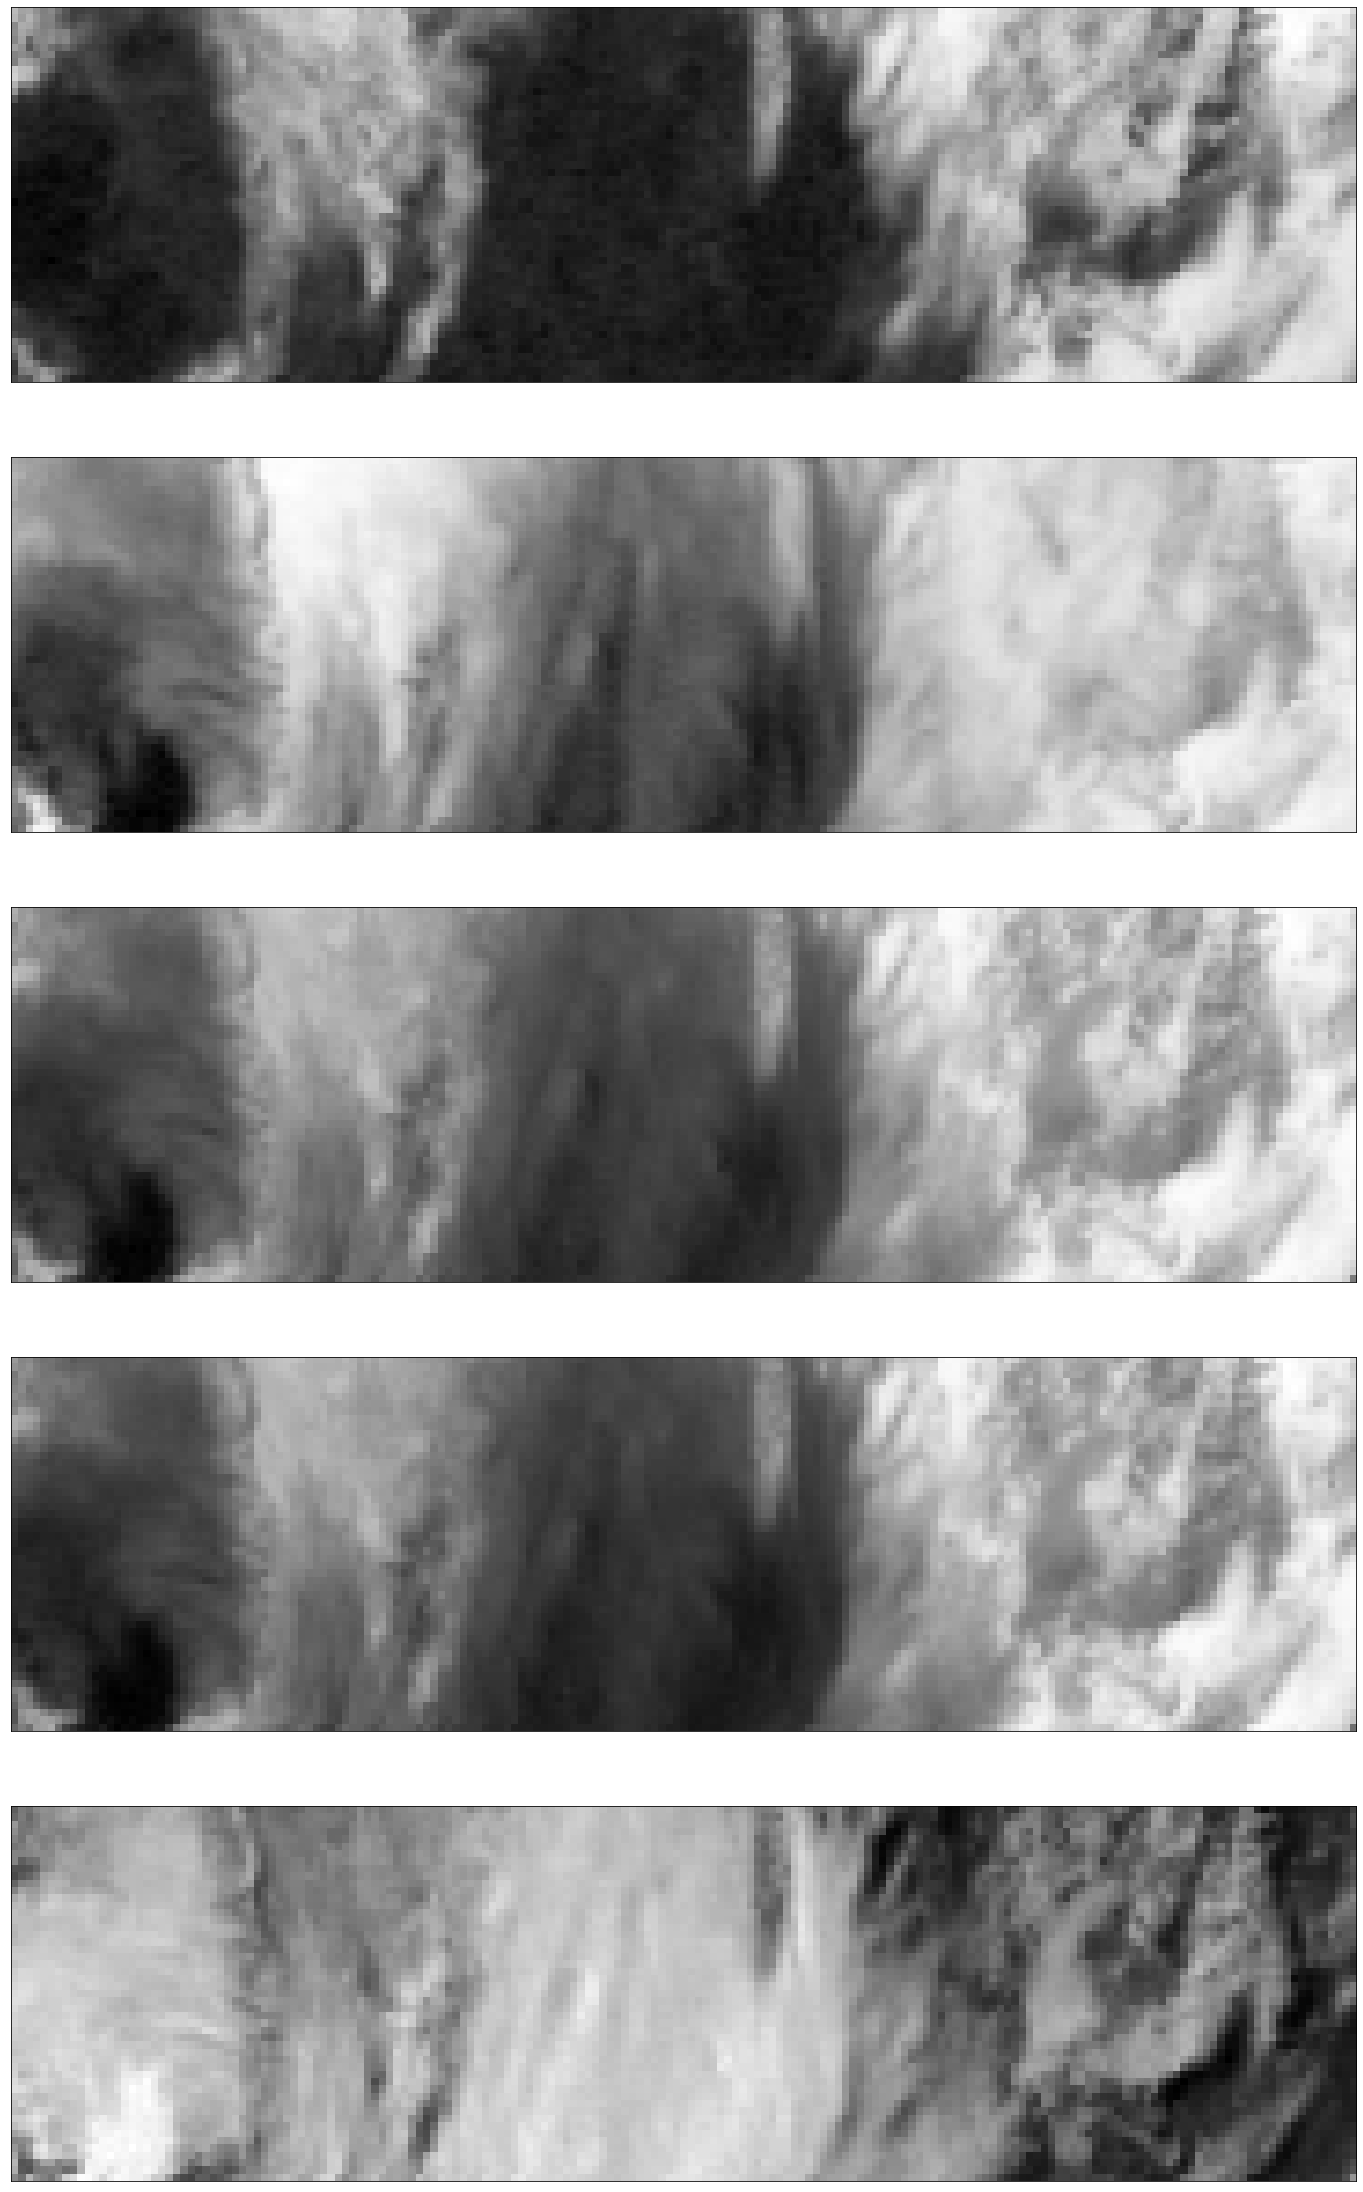

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import pyplot

ix = 1
fig = plt.figure(figsize = (40,40))
for _ in range(5):
	# specify subplot an turn of axis
	ax = fig.add_subplot(5,1, ix)
	ax.set_xticks([])
	ax.set_yticks([])
	# plot filter channel in grayscale
	pyplot.imshow(Datan[ :, :, ix-1], cmap='gray')
	ix += 1
# show the figure
pyplot.show()

## Making Data ready to feed

In [13]:
# rdata = Datan.reshape(1,51,183,5)
rdata.shape

(1, 51, 183, 5)

In [14]:
from keras.applications.imagenet_utils import preprocess_input
x= preprocess_input(rdata)

In [15]:


#Set 3 axis labels/dims
lat = np.array([21.99,21.91,21.83,21.75,21.67,21.59,21.51,21.43,21.34,21.26,21.18,21.1,21.02,20.94,20.86,20.78,20.7,20.62,20.54,20.46,20.38,20.3,20.22,20.14,20.06,19.98,19.9,19.82,19.74,19.66,19.58,19.5,19.42,19.34,19.26,19.18,19.1,19.02,18.94,18.86,18.79,18.71,18.63,18.55,18.47,18.39,18.31,18.23,18.16,18.08,18,17.92,17.84,17.76,17.68,17.61,17.53,17.45,17.37,17.29,17.22,17.14,17.06,16.98,16.91,16.83,16.75,16.67,16.6,16.52,16.44,16.36,16.29,16.21,16.13,16.05,15.98,15.9,15.82,15.75,15.67,15.59,15.51,15.44,15.36,15.28,15.21,15.13,15.05,14.98,14.9,14.82,14.75,14.67,14.6,14.52,14.44,14.37,14.29,14.21,14.14,14.06,13.99,13.91,13.83,13.76,13.68,13.61,13.53,13.46,13.38,13.3,13.23,13.15,13.08,13,12.93,12.85,12.78,12.7,12.62,12.55,12.47,12.4,12.32,12.25,12.17,12.1,12.02,11.95,11.87,11.8,11.72,11.65,11.57,11.5,11.42,11.35,11.27,11.2,11.12,11.05,10.97,10.9,10.83,10.75,10.68,10.6,10.53,10.45,10.38,10.3,10.23,10.16,10.08,10.01,9.93,9.86,9.78,9.71,9.64,9.56,9.49,9.41,9.34,9.27,9.19,9.12,9.04,8.97,8.9,8.82,8.75,8.67,8.6,8.53,8.45,8.38,8.31,8.23,8.16,8.08,8.01])
lon = np.array([82,82.07,82.15,82.21,82.29,82.36,82.43,82.51,82.59,82.65,82.73,82.8,82.87,82.95,83.1,83.19,83.27,83.35,83.42,83.5,83.58,83.65,83.72,83.8,83.87,83.95,84.02,84.09,84.16,84.23,84.3,84.37,84.44,84.51,84.58,84.65,84.72,84.79,84.86,84.93,85,85.07,85.14,85.21,85.28,85.35,85.42,85.49,85.56,85.63,85.7])
channel = np.array([1,2,3,4,5])

#Create random 3D array to simulate data from dims above
A_3D = np.random.random((183,51,5)) #(10, 20, 3)

# Create the MultiIndex from years, samples and patients.
midx = pd.MultiIndex.from_product([lat, lon, channel])

# Create sample data for each patient, and add the MultiIndex.
patient_data = pd.DataFrame(np.random.randn(len(midx), 3), index = midx)

patient_data.head(10)



0         1         2
21.99 82.00 1  0.490012  0.567900  1.260101
            2 -0.027905  1.537342 -1.336224
            3 -0.248479 -1.285210 -1.827401
            4  0.196210  0.451819 -0.629022
            5  1.761421  0.855369 -0.438902
      82.07 1 -0.543859 -2.099081 -0.946342
            2 -1.380122  0.936219 -0.686231
            3 -0.497051  0.051636  0.737238
            4  0.993884 -0.724824  0.560157
            5  0.039691  0.531761  0.151714

In [16]:
patient_data.shape

(46665, 3)

# Compiling 3Onet
here we can change our loss-function and test different model coefficients and mIOU

In [164]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
model.summary()

#model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
#featuers = model.predict(x, use_multiprocessing=True)
#featuers

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_372 (Conv2D)          (None, 50, 170, 64)       384       
_________________________________________________________________
conv2d_373 (Conv2D)          (None, 50, 170, 64)       4160      
_________________________________________________________________
activation_6 (Activation)    (None, 50, 170, 64)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 170, 64)       256       
_________________________________________________________________
conv2d_374 (Conv2D)          (None, 50, 170, 128)      8320      
_________________________________________________________________
conv2d_375 (Conv2D)          (None, 50, 170, 128)      16512     
_________________________________________________________________
activation_7 (Activation)    (None, 50, 170, 128)    

In [165]:
#features = model.predict(x, use_multiprocessing=True)
features = model.predict(xfcn, use_multiprocessing=True)
features


array([[[[-23.256594 , -14.683248 ,   2.5165832, ...,  42.13836  ,
          -35.74587  ,  75.287796 ],
         [-23.545263 , -14.542019 ,   2.395372 , ...,  41.4057   ,
          -33.98829  ,  74.44632  ],
         [-23.56463  , -14.550436 ,   2.436273 , ...,  41.65838  ,
          -34.38922  ,  74.66979  ],
         ...,
         [-23.62738  , -14.517247 ,   2.4345343, ...,  41.105732 ,
          -35.66944  ,  74.328766 ],
         [-23.218353 , -15.123905 ,   2.5069444, ...,  41.243565 ,
          -36.352425 ,  75.43622  ],
         [-22.884956 , -15.250433 ,   2.63585  , ...,  44.303978 ,
          -40.689556 ,  78.33452  ]],

        [[-23.231068 , -14.597172 ,   2.4538438, ...,  41.743626 ,
          -35.02997  ,  74.76333  ],
         [-23.5464   , -14.595683 ,   2.3917658, ...,  41.298267 ,
          -34.06955  ,  74.48155  ],
         [-23.402943 , -14.624327 ,   2.4650738, ...,  41.845333 ,
          -34.954357 ,  74.953156 ],
         ...,
         [-23.34435  , -14.658218 

In [167]:
features.shape
features3d = features.reshape(50,170,32)

## Visualizing feature maps

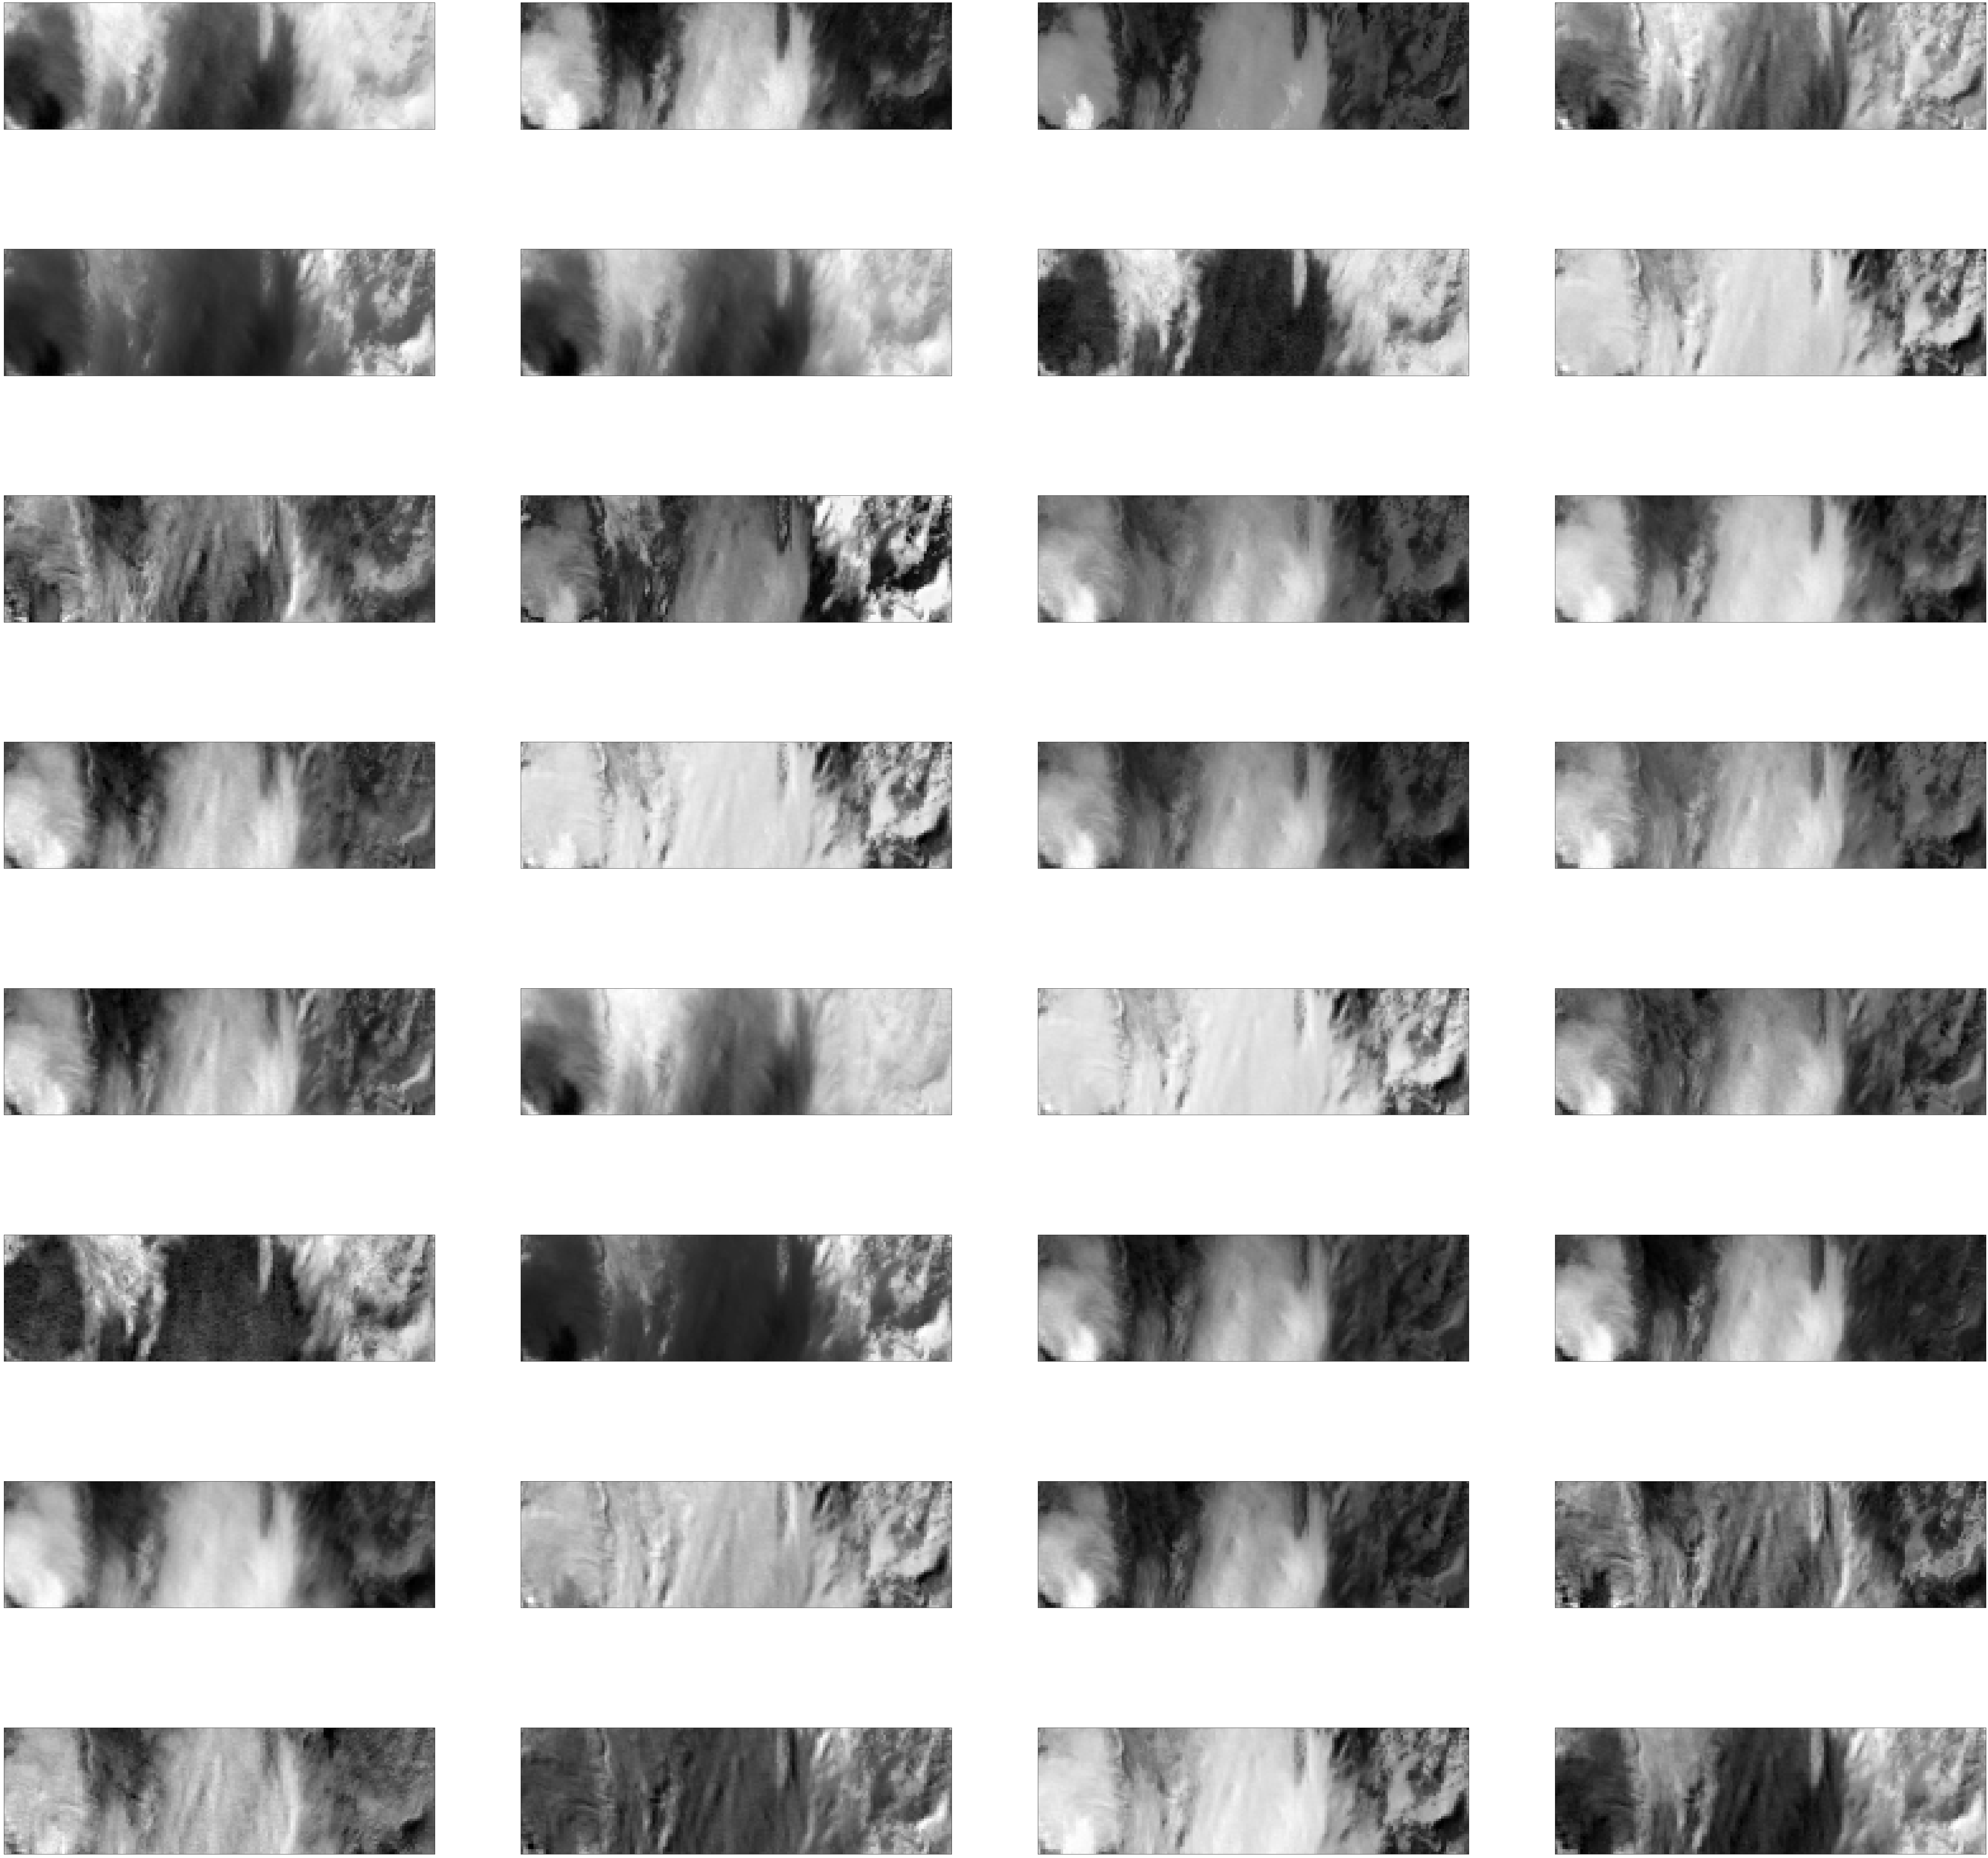

In [168]:

# plot all 32 maps in an 8x4 squares
ix = 1
fig = plt.figure(figsize = (100,100))
for _ in range(8):
	for _ in range(4):
		# specify subplot and turn of axis
		ax = fig.add_subplot(8, 4, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(features[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [3]:
import tensorflow
tensorflow.__version__



'2.2.0'

In [21]:
x

array([[[[-129.825     ,  130.599     ,  131.908     ,  229.702     ,
           294.468     ],
         [-119.541     ,  121.587     ,  120.914     ,  228.992     ,
           289.304     ],
         [-122.066     ,  123.158     ,  122.711     ,  228.265     ,
           289.954     ],
         ...,
         [-150.395     ,  169.93      ,  166.126     ,  243.35      ,
           306.466     ],
         [-151.112     ,  169.917     ,  166.843     ,  243.35      ,
           306.507     ],
         [-141.987     ,  159.029     ,  157.005     ,  242.637     ,
           300.973     ]],

        [[-126.124     ,  127.136     ,  129.243     ,  230.739     ,
           293.252     ],
         [-118.614     ,  122.873     ,  121.046     ,  230.051     ,
           287.994     ],
         [-125.31      ,  126.404     ,  126.682     ,  228.992     ,
           292.338     ],
         ...,
         [-150.87      ,  169.891     ,  166.128     ,  242.877     ,
           305.83      ],
         [

In [ ]:
y = tf.keras.layers.Conv2D(filters=32, kernel_size=1)(y)
y = tf.keras.layers.Dropout(dropout_rate)(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.layers.Activation('relu')(y)

# Fully connected layer 2
# x = tf.keras.layers.Dropout(dropout_rate)(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dense(units=len_classes)(x)
# predictions = tf.keras.layers.Activation('softmax')(x)

# Fully connected layer 2
y = tf.keras.layers.Conv2D(filters=len_classes, kernel_size=1, strides=1)(y)
y = tf.keras.layers.Dropout(dropout_rate)(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.layers.GlobalMaxPooling2D()(y)
predictions = tf.keras.layers.Activation('softmax')(y)

model = tf.keras.Model(inputs=x, outputs=predictions)
print(model.summary())

In [138]:
x.shape
x2= x[0, 0:50, 0:170,0:5]
x2.shape

(50, 170, 5)

In [139]:
x2

array([[[-129.825,  130.599, -239.132, -120.635,  -17.349],
        [-119.541,  121.587, -250.126, -121.345,  -22.513],
        [-122.066,  123.158, -248.329, -122.072,  -21.863],
        ...,
        [-121.125,  134.274, -239.775, -112.578,  -34.715],
        [-122.361,  139.99 , -238.538, -112.578,  -28.646],
        [-151.014,  162.881, -211.871, -114.563,  -12.154]],

       [[-126.124,  127.136, -241.797, -119.598,  -18.565],
        [-118.614,  122.873, -249.994, -120.286,  -23.823],
        [-125.31 ,  126.404, -244.358, -121.345,  -19.479],
        ...,
        [-121.649,  134.517, -238.704, -112.031,  -30.67 ],
        [-122.098,  135.235, -237.717, -111.493,  -25.2  ],
        [-125.354,  139.891, -235.272, -112.303,  -23.451]],

       [[-108.168,  115.766, -258.095, -117.941,  -28.05 ],
        [-120.542,  125.66 , -247.04 , -119.26 ,  -20.754],
        [-122.478,  123.512, -247.916, -122.072,  -21.475],
        ...,
        [-112.846,  126.733, -248.609, -113.133,  -38.721

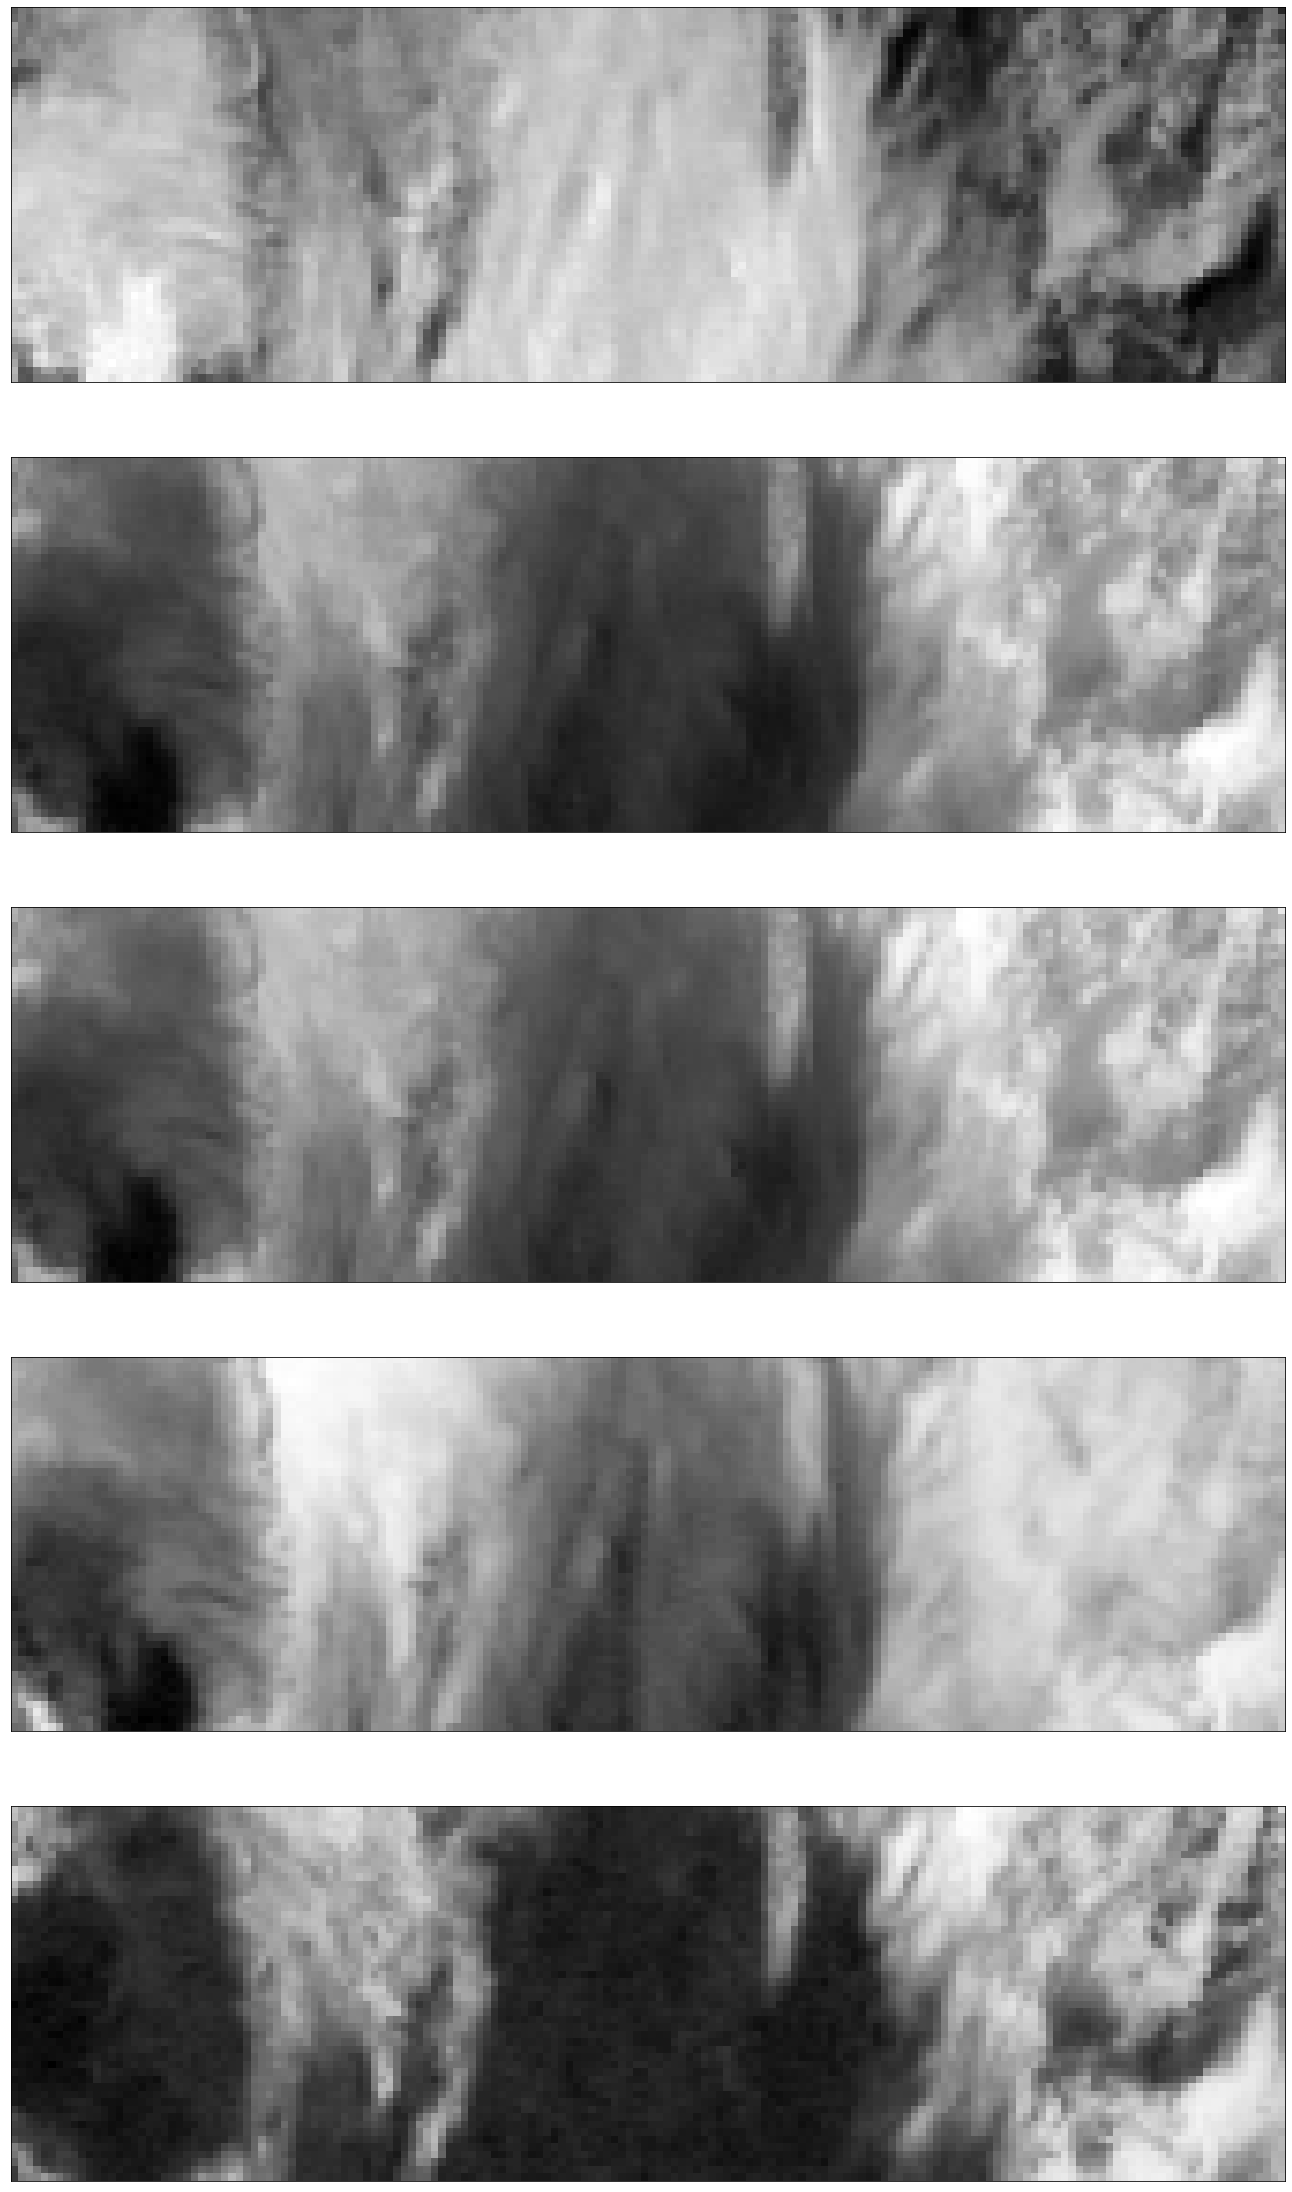

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import pyplot

ix = 1
fig = plt.figure(figsize = (40,40))
for _ in range(5):
	# specify subplot an turn of axis
	ax = fig.add_subplot(5,1, ix)
	ax.set_xticks([])
	ax.set_yticks([])
	# plot filter channel in grayscale
	pyplot.imshow(x2[ :, :, ix-1], cmap='gray')
	ix += 1
# show the figure
pyplot.show()

In [141]:
rdata2 = x2.reshape(1,50,170,5)
rdata2.shape

(1, 50, 170, 5)

In [142]:
xfcn= preprocess_input(rdata2)

# SDFCN implementation

In [154]:
from keras.layers import UpSampling2D

modelfcn = Sequential()

modelfcn.add(Conv2D(32, kernel_size=1 , padding='same', input_shape=(50,170,5)))
modelfcn.add(Conv2D(32, kernel_size=1, activation='relu'))
modelfcn.add(MaxPooling2D())

#modelfcn.add(Conv2D(32, kernel_size=2, activation='relu'))
modelfcn.add(Conv2D(64, kernel_size=2, activation='relu'))
modelfcn.add(MaxPooling2D(pool_size=(2, 2)))

# #modelfcn.add(Conv2D(128, kernel_size=2, activation='relu'))
# #modelfcn.add(Conv2D(256, kernel_size=3, activation='relu'))
# modelfcn.add(Conv2D(128, kernel_size=3, activation='relu'))
# modelfcn.add(MaxPooling2D(pool_size=(2, 2)))

# modelfcn.add(UpSampling2D(input_shape=()))
# modelfcn.add(Conv2DTranspose(64, kernel_size=3))
# # modelfcn.add(Conv2DTranspose(256, kernel_size=3))
# # modelfcn.add(Conv2DTranspose(128, kernel_size=2))


modelfcn.add(UpSampling2D(input_shape=()))
modelfcn.add(Conv2DTranspose(64, kernel_size=2))
# modelfcn.add(Conv2DTranspose(32, kernel_size=2))

modelfcn.add(UpSampling2D(input_shape=()))
modelfcn.add(Conv2D(32, kernel_size=1))
modelfcn.add(Conv2D(32, kernel_size=1))
modelfcn.summary()


Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_367 (Conv2D)          (None, 50, 170, 32)       192       
_________________________________________________________________
conv2d_368 (Conv2D)          (None, 50, 170, 32)       1056      
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 25, 85, 32)        0         
_________________________________________________________________
conv2d_369 (Conv2D)          (None, 24, 84, 64)        8256      
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 12, 42, 64)        0         
_________________________________________________________________
up_sampling2d_81 (UpSampling (None, 24, 84, 64)        0         
_________________________________________________________________
conv2d_transpose_118 (Conv2D (None, 25, 85, 64)      

In [158]:
featuresfcn = modelfcn.predict(xfcn, use_multiprocessing=True)
featuresfcn

array([[[[-18.517937  , -13.564742  , -26.250006  , ...,  -8.3270235 ,
          -33.43356   ,  12.0830555 ],
         [-18.517937  , -13.564742  , -26.250006  , ...,  -8.3270235 ,
          -33.43356   ,  12.0830555 ],
         [ -8.4552765 ,   2.3408742 ,  -5.5737996 , ...,  13.91714   ,
          -24.286165  ,  -5.789982  ],
         ...,
         [ -9.020907  ,   3.251282  ,  -6.467271  , ...,  13.187859  ,
          -24.68695   ,  -9.212962  ],
         [  9.6978445 ,  15.1456995 ,  20.367832  , ...,  21.958153  ,
            7.7273245 , -17.677511  ],
         [  9.6978445 ,  15.1456995 ,  20.367832  , ...,  21.958153  ,
            7.7273245 , -17.677511  ]],

        [[-18.517937  , -13.564742  , -26.250006  , ...,  -8.3270235 ,
          -33.43356   ,  12.0830555 ],
         [-18.517937  , -13.564742  , -26.250006  , ...,  -8.3270235 ,
          -33.43356   ,  12.0830555 ],
         [ -8.4552765 ,   2.3408742 ,  -5.5737996 , ...,  13.91714   ,
          -24.286165  ,  -5.78998

In [159]:
featuresfcn.shape

(1, 50, 170, 32)

# Spatial Features 

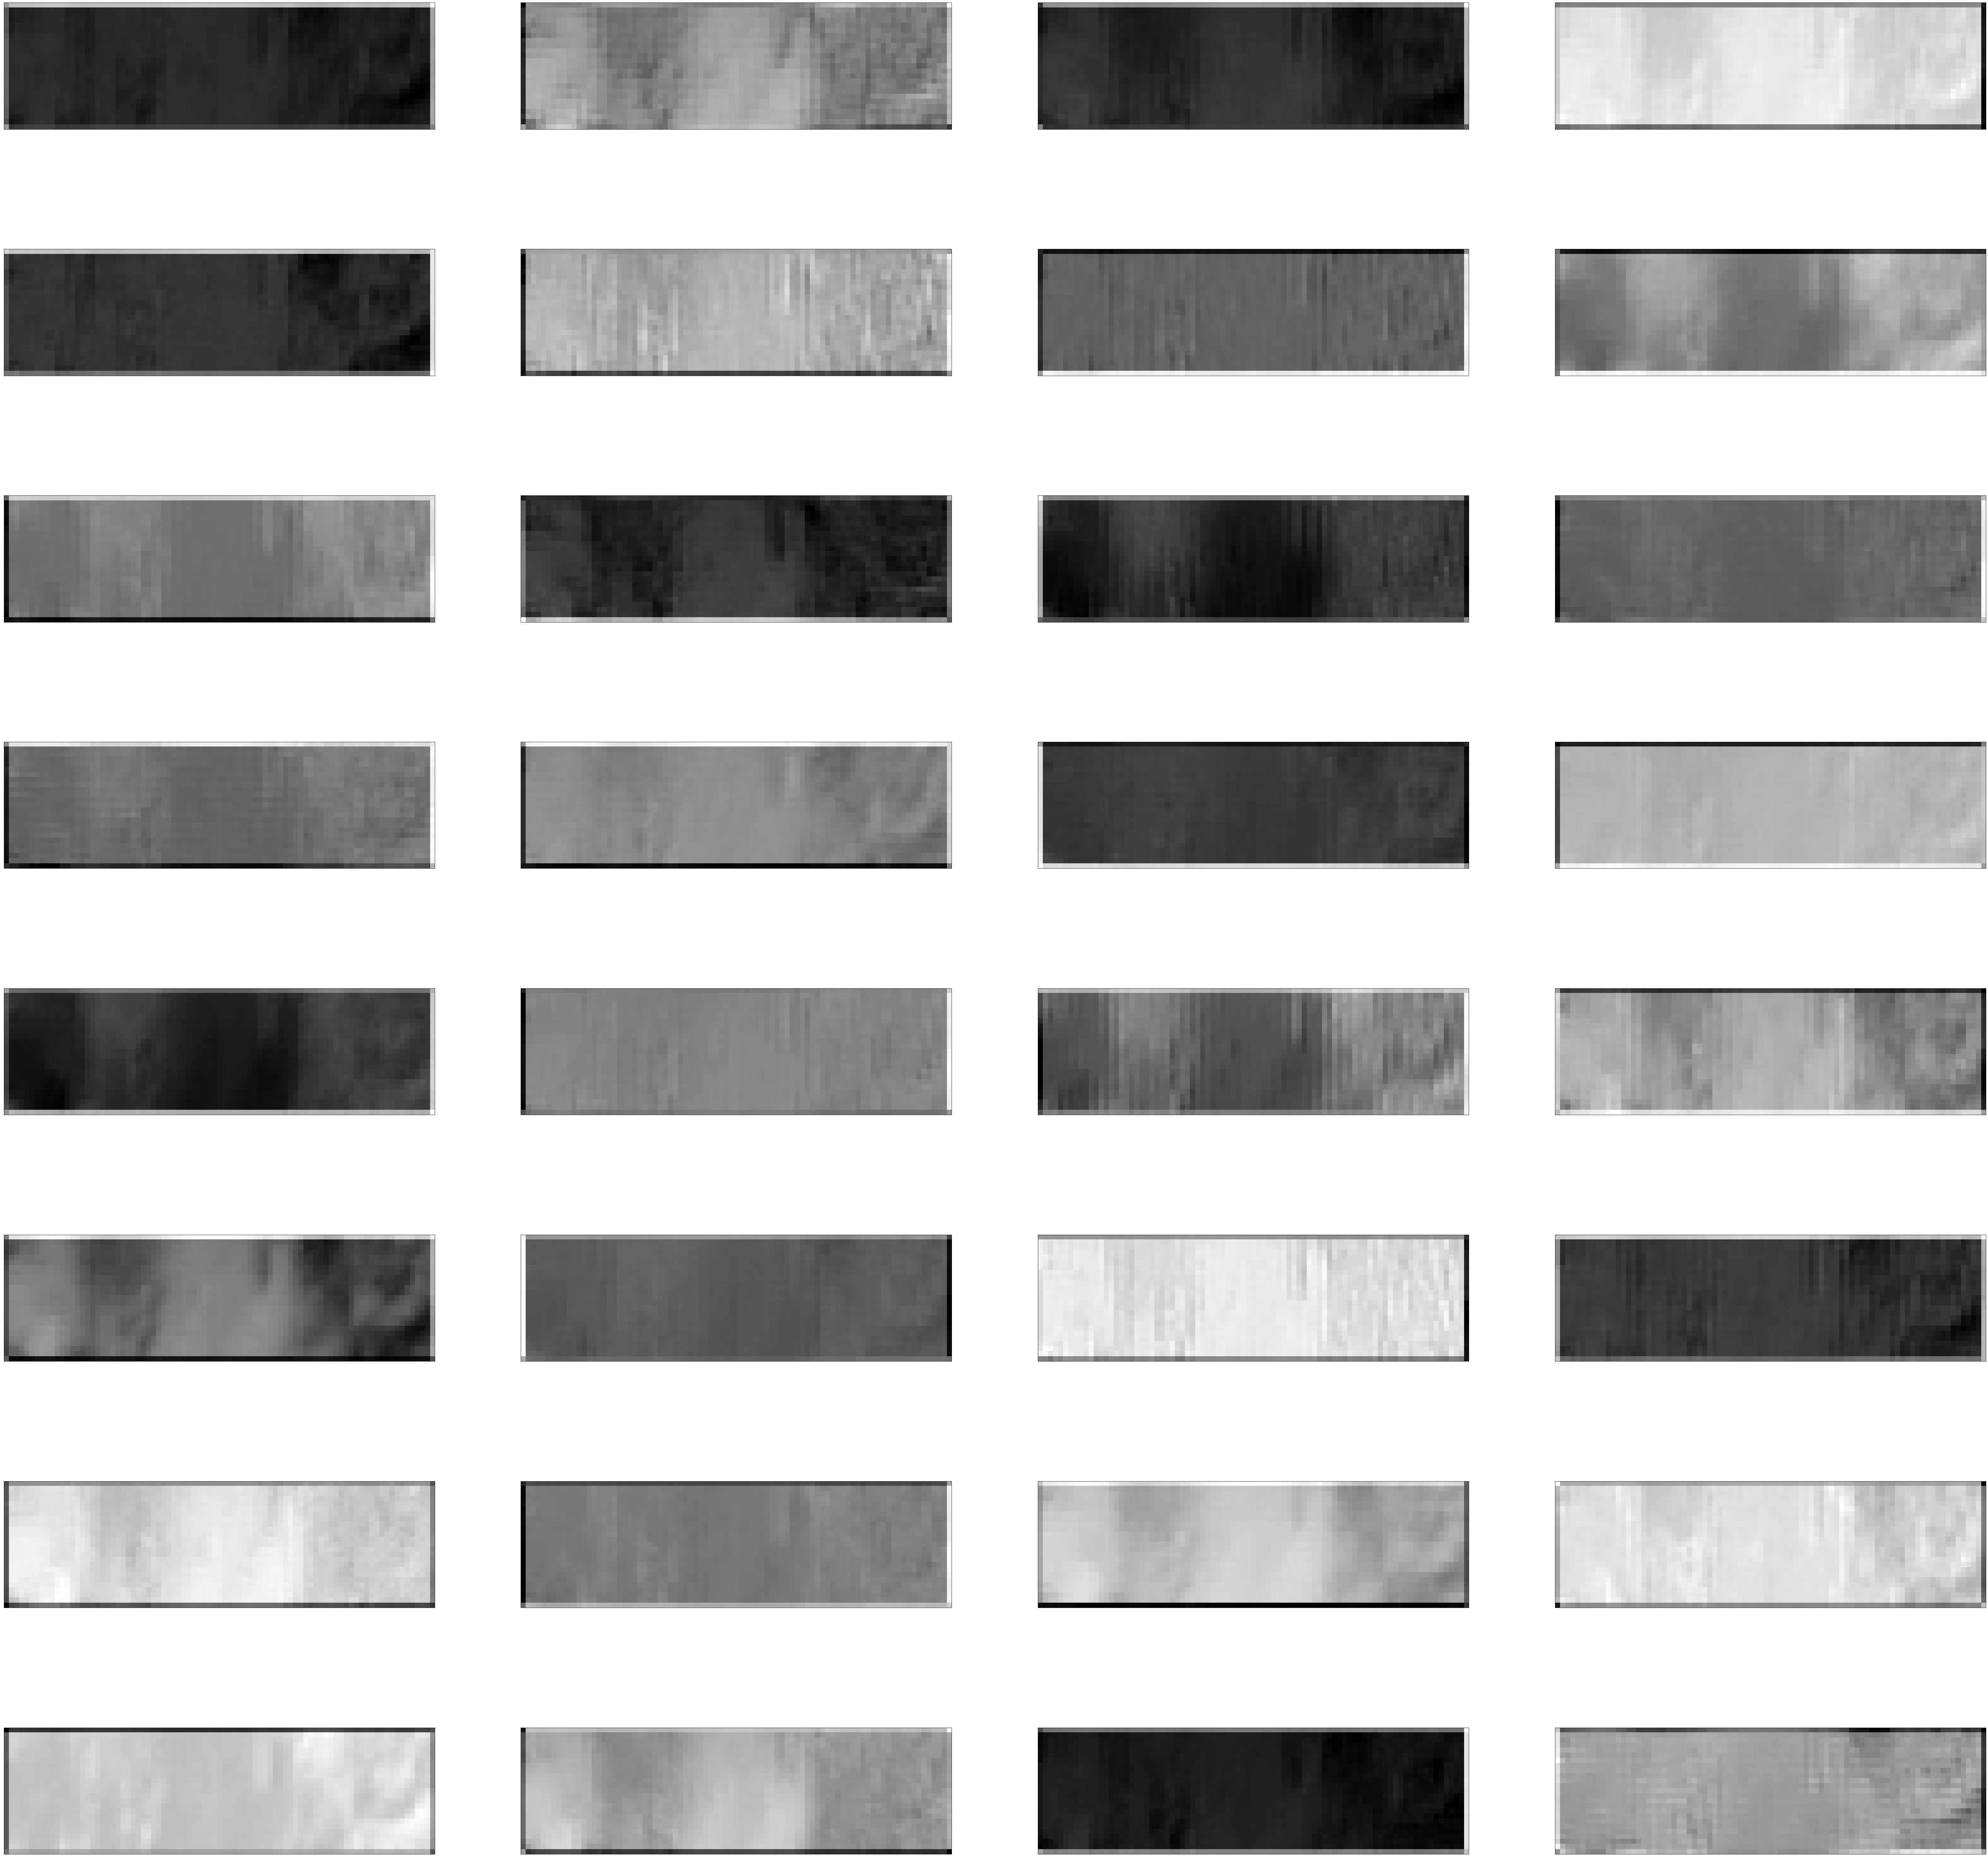

In [160]:

# plot all 32 maps in an 8x4 squares
ix = 1
figfcn = plt.figure(figsize = (100,100))
for _ in range(8):
	for _ in range(4):
		# specify subplot and turn of axis
		ax = figfcn.add_subplot(8, 4, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(featuresfcn[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [171]:
combinedf = np.add(features,featuresfcn)

In [172]:
combinedf

array([[[[-4.17745285e+01, -2.82479897e+01, -2.37334232e+01, ...,
           3.38113365e+01, -6.91794281e+01,  8.73708496e+01],
         [-4.20632019e+01, -2.81067619e+01, -2.38546333e+01, ...,
           3.30786781e+01, -6.74218445e+01,  8.65293732e+01],
         [-3.20199051e+01, -1.22095623e+01, -3.13752651e+00, ...,
           5.55755196e+01, -5.86753845e+01,  6.88798065e+01],
         ...,
         [-3.26482887e+01, -1.12659655e+01, -4.03273678e+00, ...,
           5.42935905e+01, -6.03563919e+01,  6.51158066e+01],
         [-1.35205088e+01,  2.17943192e-02,  2.28747768e+01, ...,
           6.32017174e+01, -2.86250992e+01,  5.77587051e+01],
         [-1.31871119e+01, -1.04733467e-01,  2.30036812e+01, ...,
           6.62621307e+01, -3.29622307e+01,  6.06570053e+01]],

        [[-4.17490044e+01, -2.81619148e+01, -2.37961617e+01, ...,
           3.34166031e+01, -6.84635315e+01,  8.68463821e+01],
         [-4.20643387e+01, -2.81604252e+01, -2.38582401e+01, ...,
           3.29712448e

In [174]:
combinedf.shape


(1, 50, 170, 32)

# Final concatenated Feature Maps

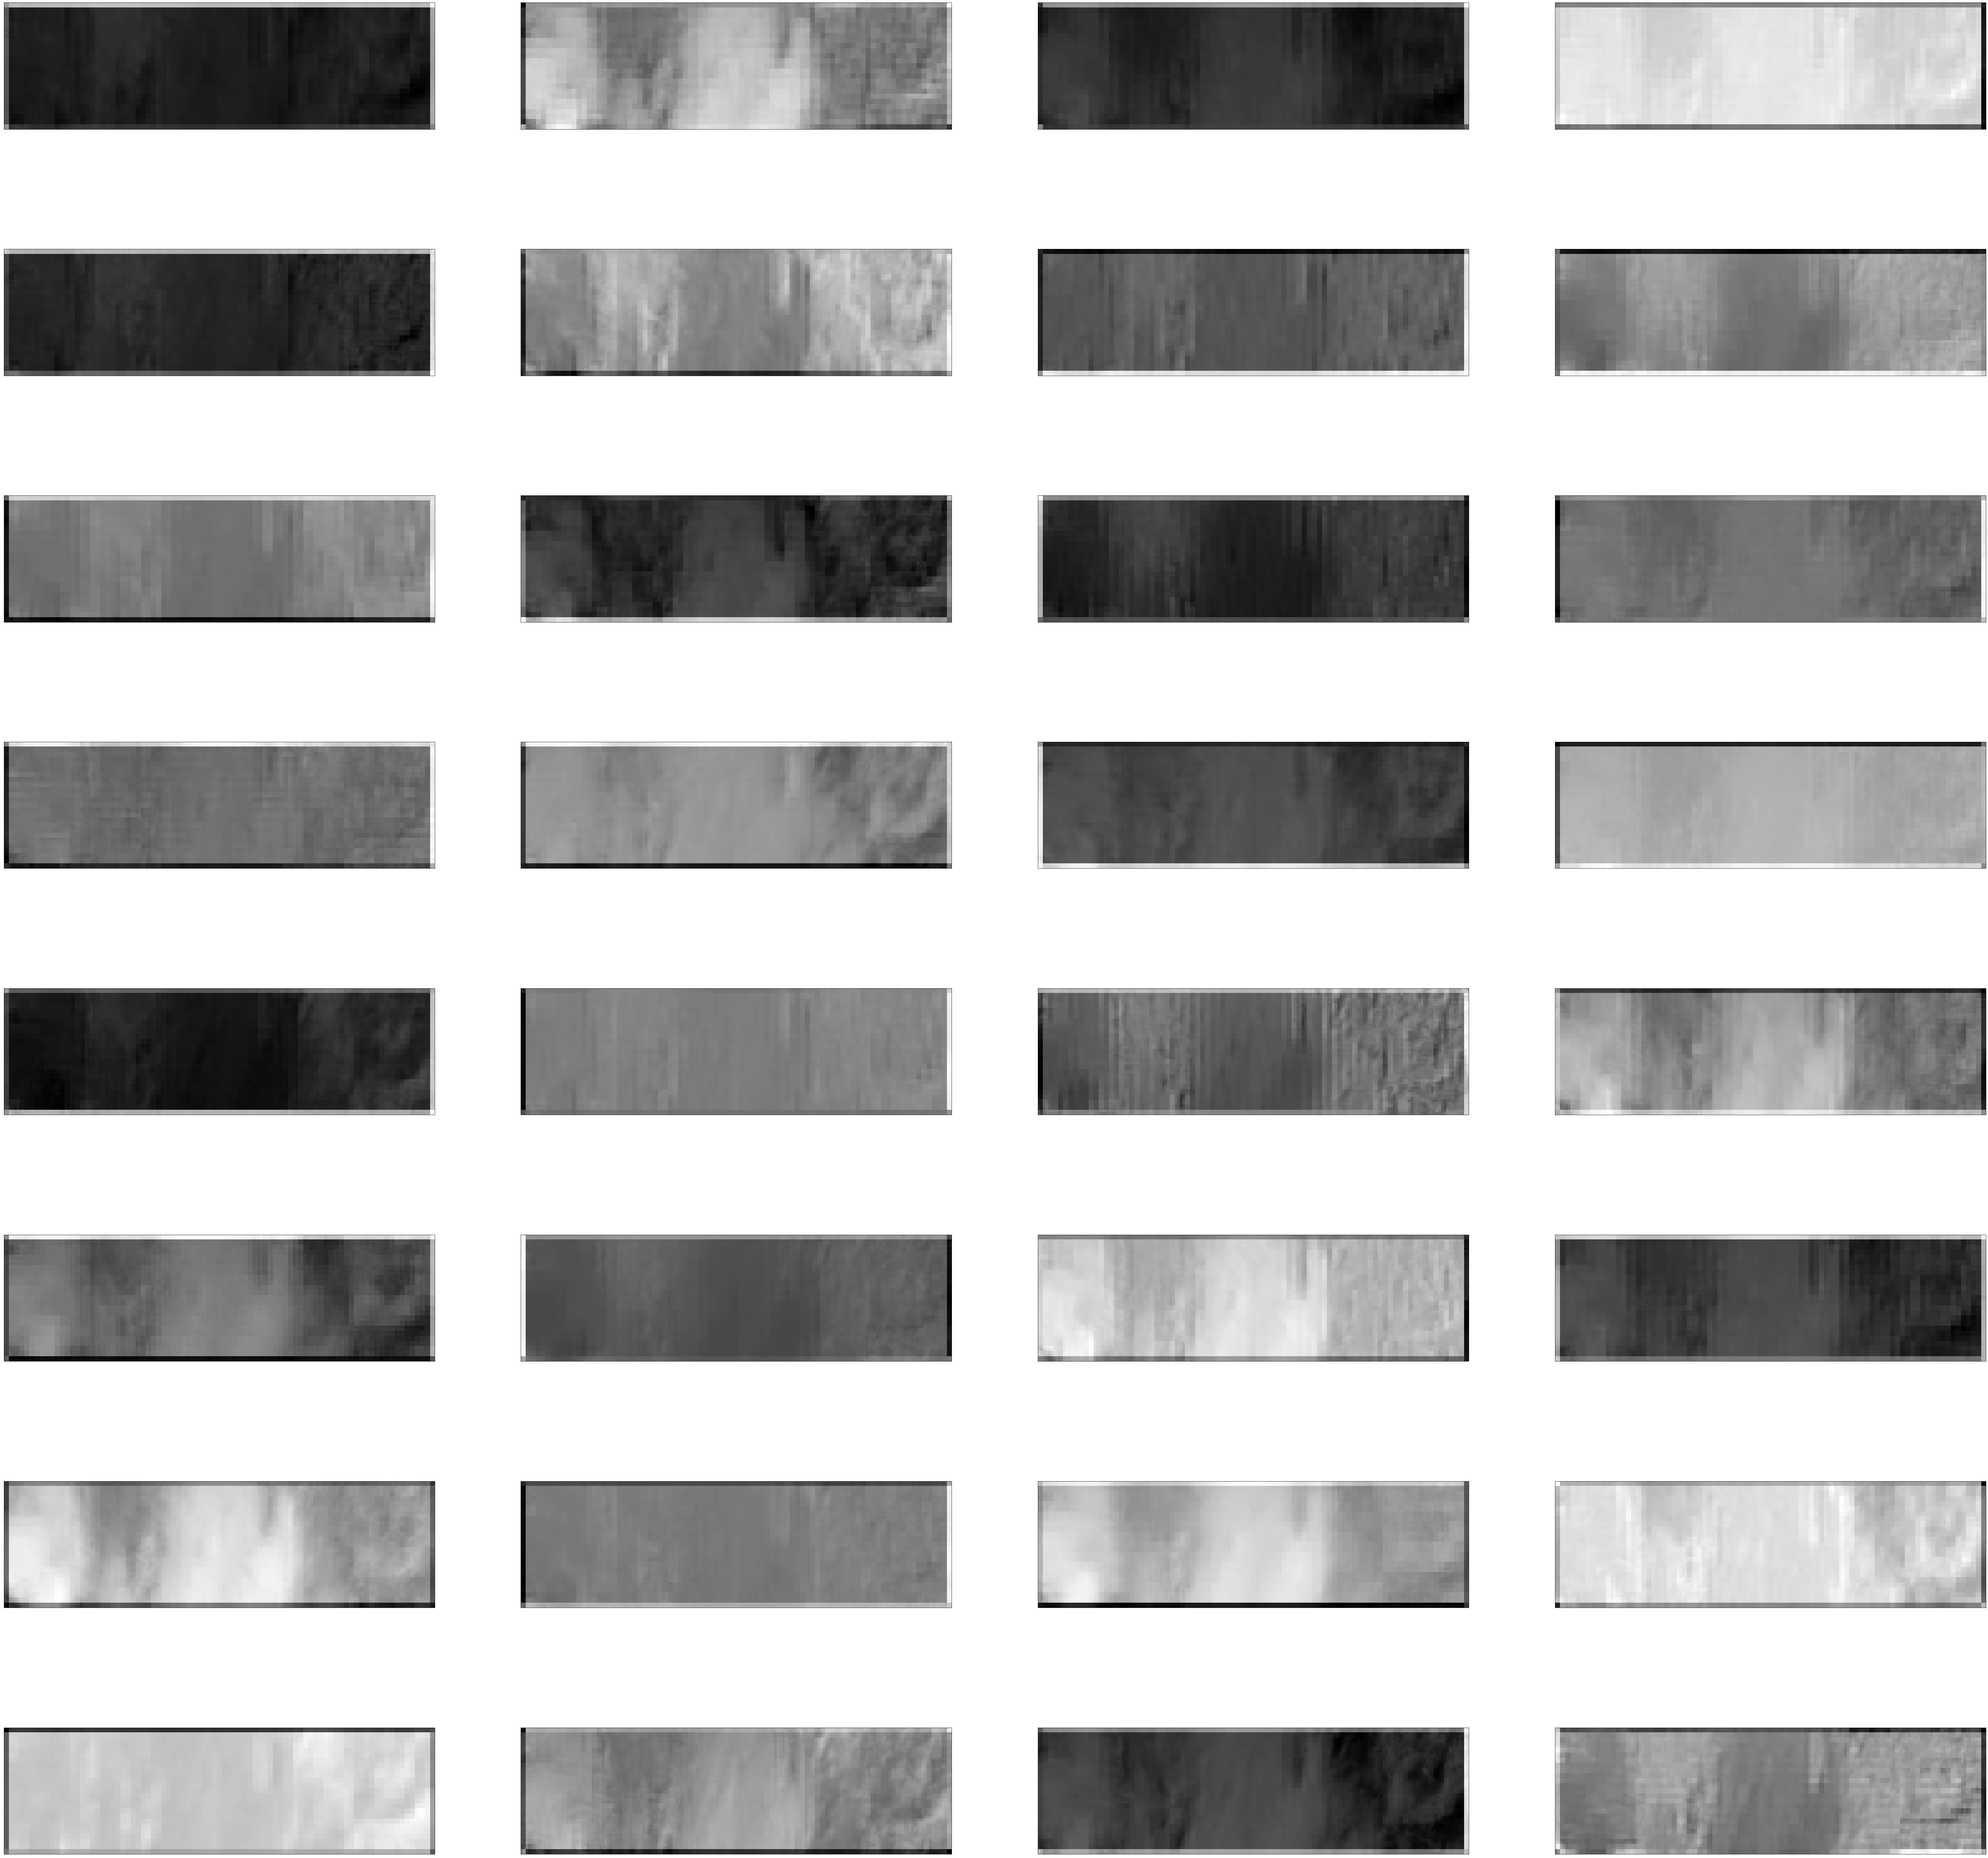

In [175]:
#plot all 32 maps in an 8x4 squares
ix = 1
figfcn = plt.figure(figsize = (100,100))
for _ in range(8):
	for _ in range(4):
		# specify subplot and turn of axis
		ax = figfcn.add_subplot(8, 4, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(combinedf[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()